In [1]:
!pip install ultralytics roboflow opencv-python matplotlib


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 949.8/949.8 kB 9.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.5/84.5 kB 3.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.8/66.8 kB 2.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.9/49.9 MB 12.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 76.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 52.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 42.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 29.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 8.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/1

In [2]:
from roboflow import Roboflow

rf = Roboflow(api_key="NJoQuVRrLIhTESYN71oH")  # Your API key
project = rf.workspace().project("furniture-detection-qiufc")

# Print available dataset versions
for version in project.versions():
    print("Available version:", version.id)


loading Roboflow workspace...
loading Roboflow project...
Available version: mahekworkspace/furniture-detection-qiufc/20


In [4]:
from roboflow import Roboflow

rf = Roboflow(api_key="NJoQuVRrLIhTESYN71oH")  # Use your API Key
project = rf.workspace().project("furniture-detection-qiufc")

# Print all available dataset versions
print("Available versions:", project.versions())


loading Roboflow workspace...
loading Roboflow project...
Available versions: [<roboflow.core.version.Version object at 0x7c4ed45c9a10>]


In [5]:
from roboflow import Roboflow

rf = Roboflow(api_key="NJoQuVRrLIhTESYN71oH")  # Your API Key
project = rf.workspace().project("furniture-detection-qiufc")

# Print all available versions properly
versions = project.versions()
for version in versions:
    print("Available version:", version.id)  # This will print the actual version number



loading Roboflow workspace...
loading Roboflow project...
Available version: mahekworkspace/furniture-detection-qiufc/20


In [6]:
from google.colab import files
uploaded = files.upload()  # This will prompt you to upload your ZIP file

Saving furniture detection.v20i.yolov8.zip to furniture detection.v20i.yolov8.zip


In [8]:
import zipfile
import os

# Unzip the file (replace with actual filename)
zip_path = "/content/furniture detection.v20i.yolov8.zip"  # Change if needed
extract_folder = "furniture-detection"

with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_folder)

print("Dataset extracted successfully!")


Dataset extracted successfully!


In [9]:
from ultralytics import YOLO

# Load the YOLOv8 model (pre-trained)
model = YOLO("yolov8n.pt")  # Use 's', 'm', or 'l' for better accuracy

# Train the model
results = model.train(
    data="/content/furniture-detection/data.yaml",  # Path to your extracted dataset
    epochs=50,  # Adjust based on need
    batch=16,   # Adjust for better training speed
    imgsz=640   # Image size for training
)


Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


100%|██████████| 6.25M/6.25M [00:00<00:00, 131MB/s]


Ultralytics 8.3.94 🚀 Python-3.11.11 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: task=detect, mode=train, model=yolov8n.pt, data=/content/furniture-detection/data.yaml, epochs=50, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True

100%|██████████| 755k/755k [00:00<00:00, 22.3MB/s]


Overriding model.yaml nc=80 with nc=25

                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      7360  ultralytics.nn.modules.block.C2f             [32, 32, 1, True]             
  3                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  4                  -1  2     49664  ultralytics.nn.modules.block.C2f             [64, 64, 2, True]             
  5                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  6                  -1  2    197632  ultralytics.nn.modules.block.C2f             [128, 128, 2, True]           
  7                  -1  1    295424  ultralytic

100%|██████████| 5.35M/5.35M [00:00<00:00, 83.9MB/s]


AMP: checks passed ✅


train: Scanning /content/furniture-detection/train/labels... 6424 images, 369 backgrounds, 0 corrupt: 100%|██████████| 6424/6424 [00:02<00:00, 2216.85it/s]


train: New cache created: /content/furniture-detection/train/labels.cache
WARNING ⚠️ Box and segment counts should be equal, but got len(segments) = 3293, len(boxes) = 8564. To resolve this only boxes will be used and all segments will be removed. To avoid this please supply either a detect or segment dataset, not a detect-segment mixed dataset.
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))


val: Scanning /content/furniture-detection/valid/labels... 891 images, 66 backgrounds, 0 corrupt: 100%|██████████| 891/891 [00:00<00:00, 936.57it/s]


val: New cache created: /content/furniture-detection/valid/labels.cache
WARNING ⚠️ Box and segment counts should be equal, but got len(segments) = 226, len(boxes) = 1023. To resolve this only boxes will be used and all segments will be removed. To avoid this please supply either a detect or segment dataset, not a detect-segment mixed dataset.
Plotting labels to runs/detect/train/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.000345, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/detect/train
Starting training for 50 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/50      2.15G      1.103      3.605      1.629         29        640: 100%|██████████| 402/402 [02:08<00:00,  3.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 28/28 [00:08<00:00,  3.15it/s]

                   all        891       1023      0.551      0.157      0.128     0.0664



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/50      2.64G      1.035      2.668      1.569         29        640: 100%|██████████| 402/402 [01:56<00:00,  3.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 28/28 [00:07<00:00,  3.93it/s]

                   all        891       1023      0.404      0.245      0.191     0.0915



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/50      2.65G      1.001       2.36      1.534         28        640: 100%|██████████| 402/402 [01:58<00:00,  3.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 28/28 [00:08<00:00,  3.49it/s]

                   all        891       1023      0.426      0.281      0.242      0.125



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/50      2.68G      0.973      2.172      1.508         31        640: 100%|██████████| 402/402 [01:56<00:00,  3.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 28/28 [00:08<00:00,  3.42it/s]

                   all        891       1023      0.397      0.335      0.276      0.144



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/50      2.69G     0.9523      2.042      1.483         19        640: 100%|██████████| 402/402 [02:00<00:00,  3.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 28/28 [00:08<00:00,  3.39it/s]


                   all        891       1023      0.525      0.361       0.35      0.181

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/50      2.71G     0.9363      1.934      1.475         19        640: 100%|██████████| 402/402 [02:00<00:00,  3.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 28/28 [00:07<00:00,  3.96it/s]

                   all        891       1023      0.454      0.393      0.353      0.189



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/50      2.72G     0.9175       1.84      1.461         24        640: 100%|██████████| 402/402 [01:58<00:00,  3.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 28/28 [00:08<00:00,  3.23it/s]

                   all        891       1023       0.45      0.359      0.362      0.183



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/50      2.74G     0.9036      1.775      1.453         21        640: 100%|██████████| 402/402 [02:00<00:00,  3.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 28/28 [00:08<00:00,  3.39it/s]

                   all        891       1023      0.499      0.371      0.401      0.232



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/50      2.76G      0.881      1.723       1.43         29        640: 100%|██████████| 402/402 [01:59<00:00,  3.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 28/28 [00:07<00:00,  3.79it/s]

                   all        891       1023      0.507      0.382      0.409      0.218



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/50      2.78G     0.8785      1.676      1.424         22        640: 100%|██████████| 402/402 [02:01<00:00,  3.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 28/28 [00:07<00:00,  3.88it/s]

                   all        891       1023       0.52      0.447      0.475      0.256



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/50      2.79G     0.8638      1.616      1.414         28        640: 100%|██████████| 402/402 [01:59<00:00,  3.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 28/28 [00:08<00:00,  3.34it/s]

                   all        891       1023      0.551      0.465      0.485      0.273



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/50      2.81G     0.8623      1.584       1.41         25        640: 100%|██████████| 402/402 [02:05<00:00,  3.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 28/28 [00:08<00:00,  3.24it/s]

                   all        891       1023      0.511      0.452      0.461      0.258



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/50      2.82G     0.8492      1.538      1.398         35        640: 100%|██████████| 402/402 [02:01<00:00,  3.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 28/28 [00:08<00:00,  3.40it/s]

                   all        891       1023      0.529      0.458      0.459      0.262



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/50      2.85G     0.8508      1.515      1.402         32        640: 100%|██████████| 402/402 [01:58<00:00,  3.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 28/28 [00:08<00:00,  3.40it/s]

                   all        891       1023      0.523      0.457      0.478      0.286



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/50      2.86G     0.8235      1.477      1.387         20        640: 100%|██████████| 402/402 [02:00<00:00,  3.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 28/28 [00:07<00:00,  3.95it/s]

                   all        891       1023      0.518      0.471      0.491       0.28



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/50      2.88G     0.8242      1.449      1.382         21        640: 100%|██████████| 402/402 [01:58<00:00,  3.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 28/28 [00:08<00:00,  3.32it/s]

                   all        891       1023      0.548      0.485      0.513      0.304



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/50      2.89G     0.8126      1.431      1.375         29        640: 100%|██████████| 402/402 [01:59<00:00,  3.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 28/28 [00:08<00:00,  3.30it/s]

                   all        891       1023      0.536      0.539      0.538      0.335



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/50      2.91G     0.8154      1.407      1.373         24        640: 100%|██████████| 402/402 [01:58<00:00,  3.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 28/28 [00:07<00:00,  3.58it/s]

                   all        891       1023      0.496      0.559      0.522      0.302



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/50      2.93G      0.807      1.393      1.369         27        640: 100%|██████████| 402/402 [01:58<00:00,  3.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 28/28 [00:07<00:00,  3.92it/s]

                   all        891       1023      0.491      0.513      0.541      0.328



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/50      2.95G     0.8063      1.367      1.365         26        640: 100%|██████████| 402/402 [01:58<00:00,  3.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 28/28 [00:08<00:00,  3.37it/s]

                   all        891       1023      0.504      0.505      0.511      0.307



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/50      2.96G     0.7964      1.345      1.358         19        640: 100%|██████████| 402/402 [01:58<00:00,  3.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 28/28 [00:08<00:00,  3.49it/s]

                   all        891       1023      0.483      0.555       0.55      0.315



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/50      2.98G     0.7807      1.318      1.343         32        640: 100%|██████████| 402/402 [01:58<00:00,  3.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 28/28 [00:07<00:00,  3.91it/s]

                   all        891       1023      0.525      0.523      0.536      0.313



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/50      2.99G     0.7774      1.309      1.345         23        640: 100%|██████████| 402/402 [02:00<00:00,  3.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 28/28 [00:07<00:00,  3.58it/s]

                   all        891       1023      0.493      0.627      0.563      0.341



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/50      3.02G     0.7692      1.283      1.338         27        640: 100%|██████████| 402/402 [02:00<00:00,  3.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 28/28 [00:08<00:00,  3.38it/s]

                   all        891       1023      0.582      0.542       0.56      0.348



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/50      3.03G     0.7617      1.274      1.334         28        640: 100%|██████████| 402/402 [01:57<00:00,  3.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 28/28 [00:07<00:00,  3.52it/s]

                   all        891       1023      0.597      0.533      0.565      0.332



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      26/50      3.05G     0.7634      1.249       1.33         28        640: 100%|██████████| 402/402 [01:59<00:00,  3.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 28/28 [00:07<00:00,  3.99it/s]

                   all        891       1023      0.552      0.546      0.569      0.353



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      27/50      3.06G     0.7671      1.247      1.339         26        640: 100%|██████████| 402/402 [01:59<00:00,  3.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 28/28 [00:08<00:00,  3.49it/s]

                   all        891       1023      0.612      0.548      0.579      0.354



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      28/50      3.09G     0.7481      1.219      1.321         24        640: 100%|██████████| 402/402 [01:58<00:00,  3.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 28/28 [00:08<00:00,  3.31it/s]

                   all        891       1023      0.584      0.553      0.581      0.357



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      29/50       3.1G     0.7421      1.211      1.317         30        640: 100%|██████████| 402/402 [01:57<00:00,  3.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 28/28 [00:07<00:00,  3.89it/s]

                   all        891       1023      0.569      0.572       0.59      0.362



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      30/50      3.12G     0.7494      1.196      1.321         28        640: 100%|██████████| 402/402 [01:58<00:00,  3.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 28/28 [00:07<00:00,  3.68it/s]

                   all        891       1023      0.551      0.571      0.578      0.364



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      31/50      3.13G     0.7308      1.171      1.305         27        640: 100%|██████████| 402/402 [01:57<00:00,  3.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 28/28 [00:08<00:00,  3.47it/s]

                   all        891       1023      0.608      0.513      0.574       0.35



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      32/50      3.15G     0.7225      1.164      1.301         18        640: 100%|██████████| 402/402 [01:56<00:00,  3.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 28/28 [00:07<00:00,  3.97it/s]

                   all        891       1023      0.577      0.587       0.61      0.383



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      33/50      3.17G     0.7232      1.142      1.299         24        640: 100%|██████████| 402/402 [01:56<00:00,  3.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 28/28 [00:08<00:00,  3.41it/s]

                   all        891       1023      0.598      0.567      0.588      0.361



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      34/50      3.19G     0.7184      1.133      1.296         26        640: 100%|██████████| 402/402 [01:56<00:00,  3.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 28/28 [00:07<00:00,  3.81it/s]

                   all        891       1023      0.632      0.541      0.594      0.361



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      35/50       3.2G     0.7158      1.114      1.293         24        640: 100%|██████████| 402/402 [01:54<00:00,  3.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 28/28 [00:08<00:00,  3.46it/s]

                   all        891       1023      0.629      0.561      0.596      0.373



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      36/50      3.22G     0.7094      1.114       1.29         38        640: 100%|██████████| 402/402 [01:58<00:00,  3.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 28/28 [00:08<00:00,  3.37it/s]

                   all        891       1023      0.602      0.566       0.59      0.368



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      37/50      3.23G     0.7116      1.103      1.293         29        640: 100%|██████████| 402/402 [01:55<00:00,  3.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 28/28 [00:07<00:00,  3.60it/s]

                   all        891       1023      0.602      0.565       0.59      0.366



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      38/50      3.26G     0.7037      1.097      1.286         33        640: 100%|██████████| 402/402 [01:56<00:00,  3.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 28/28 [00:07<00:00,  3.50it/s]

                   all        891       1023      0.524      0.615      0.592      0.375



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      39/50      3.27G      0.709      1.093      1.286         29        640: 100%|██████████| 402/402 [01:54<00:00,  3.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 28/28 [00:07<00:00,  3.58it/s]

                   all        891       1023      0.642      0.537      0.604      0.377



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      40/50      3.29G     0.6888      1.074      1.273         23        640: 100%|██████████| 402/402 [01:56<00:00,  3.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 28/28 [00:07<00:00,  3.52it/s]

                   all        891       1023      0.611      0.555        0.6      0.386


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      41/50       3.3G     0.6834     0.9652      1.361          9        640: 100%|██████████| 402/402 [01:51<00:00,  3.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 28/28 [00:08<00:00,  3.48it/s]

                   all        891       1023      0.564      0.607      0.586      0.375



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      42/50      3.32G     0.6583     0.8992      1.343          8        640: 100%|██████████| 402/402 [01:51<00:00,  3.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 28/28 [00:08<00:00,  3.41it/s]

                   all        891       1023      0.598      0.601       0.58      0.371



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      43/50      3.33G     0.6456     0.8763      1.326         12        640: 100%|██████████| 402/402 [01:52<00:00,  3.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 28/28 [00:06<00:00,  4.08it/s]

                   all        891       1023      0.634      0.558      0.591      0.369



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      44/50      3.36G     0.6343     0.8465      1.319          8        640: 100%|██████████| 402/402 [01:51<00:00,  3.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 28/28 [00:07<00:00,  3.97it/s]

                   all        891       1023      0.649      0.559      0.599      0.384



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      45/50      3.37G       0.63     0.8402      1.314          9        640: 100%|██████████| 402/402 [01:51<00:00,  3.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 28/28 [00:06<00:00,  4.10it/s]

                   all        891       1023      0.623      0.578      0.608      0.383



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      46/50      3.39G      0.622     0.8185      1.302          8        640: 100%|██████████| 402/402 [01:50<00:00,  3.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 28/28 [00:07<00:00,  3.83it/s]

                   all        891       1023      0.596      0.589      0.611      0.391



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      47/50       3.4G     0.6052     0.7999      1.294         13        640: 100%|██████████| 402/402 [01:51<00:00,  3.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 28/28 [00:07<00:00,  3.97it/s]

                   all        891       1023      0.624      0.578      0.601      0.385



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      48/50      3.43G     0.6047     0.7949      1.294          9        640: 100%|██████████| 402/402 [01:49<00:00,  3.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 28/28 [00:06<00:00,  4.14it/s]

                   all        891       1023      0.609      0.583      0.599      0.381



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      49/50      3.44G     0.5952     0.7885      1.288          8        640: 100%|██████████| 402/402 [01:51<00:00,  3.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 28/28 [00:07<00:00,  3.96it/s]

                   all        891       1023      0.602      0.592      0.603      0.386



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      50/50      3.46G     0.5968     0.7817      1.287          8        640: 100%|██████████| 402/402 [01:56<00:00,  3.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 28/28 [00:08<00:00,  3.40it/s]

                   all        891       1023      0.586      0.621      0.603      0.392



50 epochs completed in 1.746 hours.
Optimizer stripped from runs/detect/train/weights/last.pt, 6.3MB
Optimizer stripped from runs/detect/train/weights/best.pt, 6.3MB

Validating runs/detect/train/weights/best.pt...
Ultralytics 8.3.94 🚀 Python-3.11.11 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 72 layers, 3,010,523 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 28/28 [00:09<00:00,  3.09it/s]


                   all        891       1023      0.643      0.551      0.603      0.392
                   Bed         70         71      0.882      0.831      0.851      0.647
               Cabinet         46         55      0.588      0.519      0.551      0.327
                Carpet         16         18      0.391      0.389      0.386      0.343
         Ceramic floor         10         12      0.231       0.25      0.198      0.131
                 Chair         66         76      0.768      0.698      0.786      0.475
                Closet         30         31      0.766      0.738      0.837      0.704
              Cupboard         24         25      0.813        0.8      0.823      0.618
              Curtains         20         23      0.322      0.268      0.354      0.242
          Dining Table         39         39      0.803      0.436      0.597      0.356
                  Door          8          9      0.655      0.214      0.398      0.214
                 Fram


image 1/1 /content/istockphoto-1270146918-612x612.jpg: 448x640 (no detections), 11.2ms
Speed: 2.5ms preprocess, 11.2ms inference, 0.7ms postprocess per image at shape (1, 3, 448, 640)


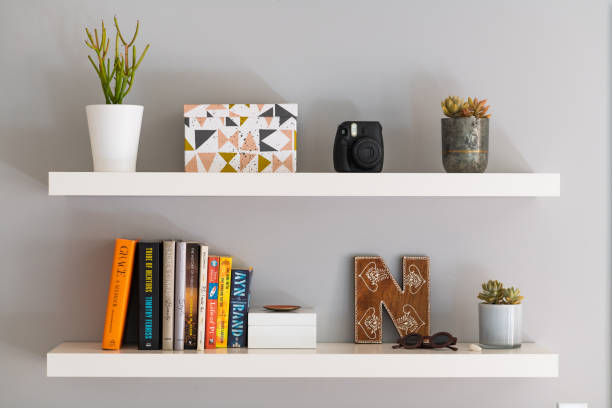

In [11]:
results = model("/content/istockphoto-1270146918-612x612.jpg")

# Get the first result from the list
result = results[0]

# Show the detected image
result.show()


image 1/1 /content/4thaug_2ndhalf5934_green.webp: 640x640 1 Chair, 1 Sofa, 9.3ms
Speed: 3.6ms preprocess, 9.3ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


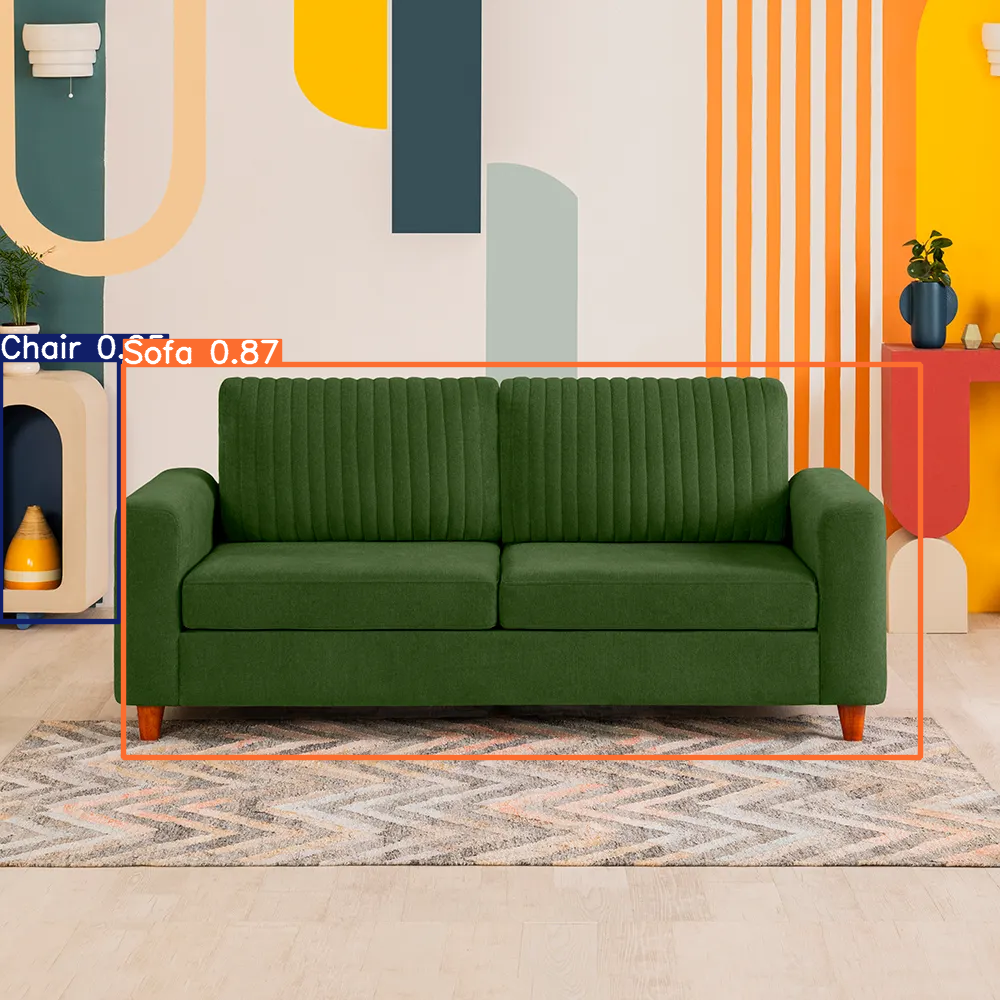

In [13]:
results = model("/content/4thaug_2ndhalf5934_green.webp")

# Get the first result from the list
result = results[0]

# Show the detected image
result.show()


image 1/1 /content/71XFncR7MeL._AC_UF1000,1000_QL80_.jpg: 640x352 1 Closet, 42.5ms
Speed: 2.5ms preprocess, 42.5ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 352)


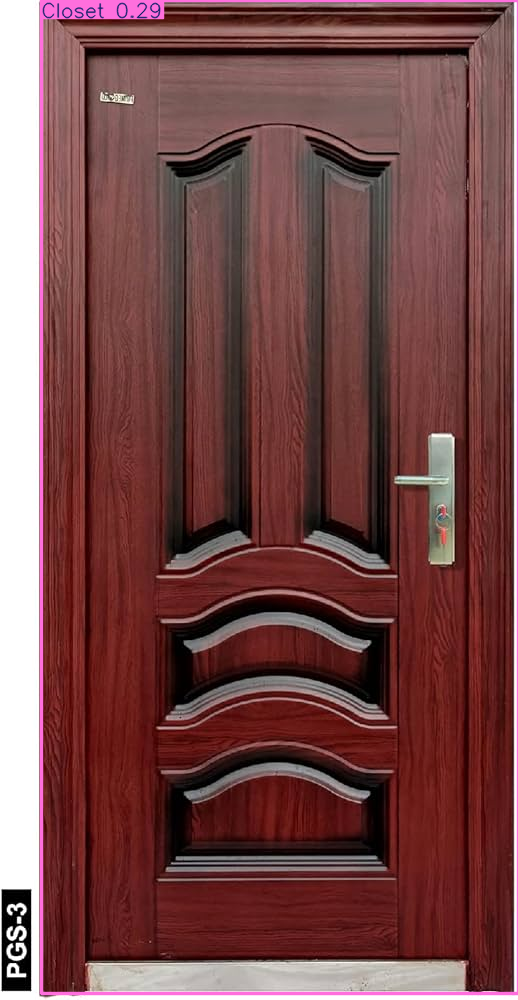

In [14]:
results = model("/content/71XFncR7MeL._AC_UF1000,1000_QL80_.jpg")

# Get the first result from the list
result = results[0]

# Show the detected image
result.show()